# EXO 11 : Torsion of a cylinder of elliptic cross-section


[missing $\LaTeX$]

\left\lbrace \begin{array}{cc}
\frac{\partial \psi }{\partial x_1 }=\frac{\partial \phi }{\partial x_2 } &amp; \\
\frac{\partial \psi }{\partial x_2 }=-\frac{\partial \phi }{\partial x_1 } &amp; 
\end{array}\right.

We consider a cylinder of axis
, of undefined cross-section submitted to torsion.
##  Preliminary calculation :
We recall that the so-called warping function
must satisfy the both equations :
(1)
(2)

Recall how these equations have been established and in which points of the cylinder they must be verified.
We propose the following substitution of variables defining the function
, harmonic conjugate of
:

Show that after integration, equation (2) , established from the boundary conditions becomes :
We define the function

Show that condition given by equation (1) implies :
.

##  Application to elliptic cross-section
We consider an elliptic cross-section cylinder of axis
submitted to a torsion couple C. The boundary curve of
:

the cross section is described (cf. figure) by the equation
In that case, justify the choice of the function

Determine the function
where
and study the variations of the displacement
iso-displacement curves)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Expression of

In [2]:
x, y, A, B, L = symbols('x y A B L')

In [5]:
f=L*(x**2/A**2+y**2/B**2-1)
f

L*(-1 + y**2/B**2 + x**2/A**2)

In [20]:
divf = f.diff(x, x) + f.diff(y, y)
divf

2*L/B**2 + 2*L/A**2

In [25]:
λ = solve(Eq(divf, 2), L)[0]
λ

A**2*B**2/(A**2 + B**2)

In [26]:
f=λ*(x**2/A**2+y**2/B**2-1)
f

A**2*B**2*(-1 + y**2/B**2 + x**2/A**2)/(A**2 + B**2)

[missing $\LaTeX$]

so the function is :
If we take the partial derivatives of fin its form:
(1) and
Deriving the other form:
, we obtain:
(2)
, we obtain:

In [27]:
dfx = diff(f, x)
dfx

2*B**2*x/(A**2 + B**2)

In [28]:
dfy = diff(f, y)
dfy

2*A**2*y/(A**2 + B**2)

In [30]:
dphi_x = dfx-x
dphi_y = dfy -y
simplify(dphi_x)

x*(-A**2 + B**2)/(A**2 + B**2)

In [31]:
simplify(dphi_y)

y*(A**2 - B**2)/(A**2 + B**2)

[missing $\LaTeX$]

we can further find
integrating :
or

In [36]:
phi1 = simplify(integrate(dphi_x, y))
phi1

x*y*(-A**2 + B**2)/(A**2 + B**2)

In [38]:
phi2 = simplify(integrate(-dphi_y, x))
phi2

x*y*(-A**2 + B**2)/(A**2 + B**2)

We indeed find the same result which is obtained to a constant :

[missing $\LaTeX$]

Since the stress is linked to the dervative of
and
, the value is not important. Furthermore at the center in
, the displacement is nul so that, one can take :

## Evolution of the function
Let's draw the function and its isovalues

In [100]:
%matplotlib notebook

In [120]:
A=4
B=2
#x=-A:0.02:A;
x = np.arange(-A, A, .02)
y = np.arange(-B, B, .02)
X, Y = np.meshgrid(x,y)
Z = X*Y*(B**2 - A**2)/(A**2 + B**2)

In [121]:
w = X**2/A**2 +Y**2/B**2 > .99
Z[w] = np.nan # to eliminate data over the boundary

<IPython.core.display.Javascript object>


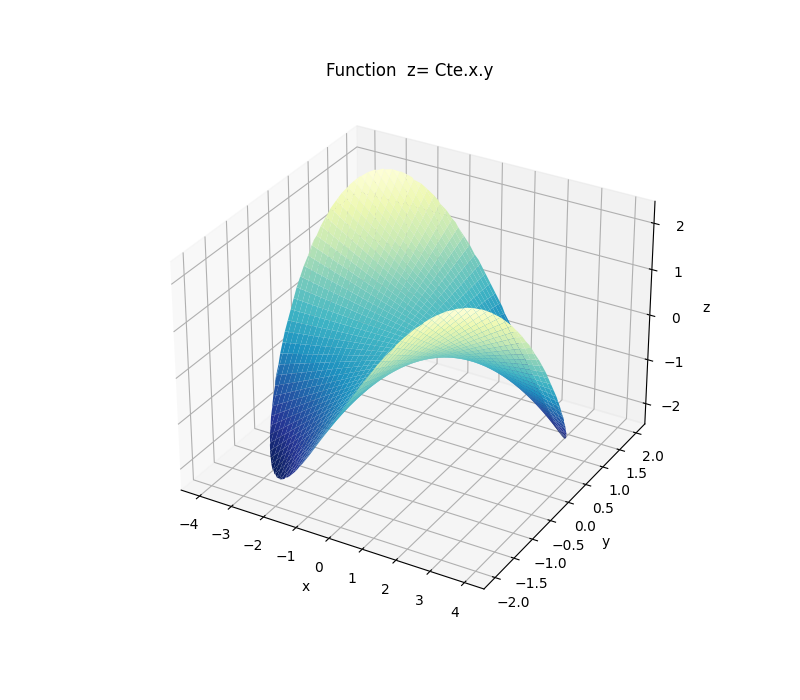

Text(0.5, 0, 'z')

In [122]:
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap='YlGnBu_r' )
ax.set_title('Function  z= Cte.x.y')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


In [138]:
Z[~w].min()

-2.36880000000001

<IPython.core.display.Javascript object>


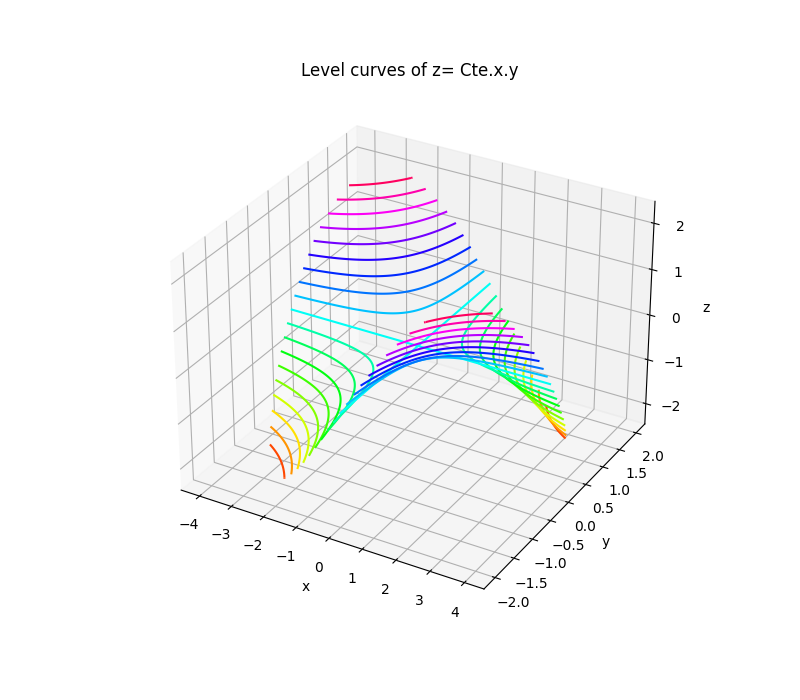

Text(0.5, 0, 'z')

In [143]:
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw={'projection': '3d'})
levels= np.arange(Z[~w].min(), Z[~w].max(), Z[~w].max()/10)
ax.contour(X, Y, Z, levels=levels, cmap='hsv')
ax.set_title('Level curves of z= Cte.x.y')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Torsion couple

We have seen during the lecture that [missing $\LaTeX$]

In [144]:
x, y, A, B = symbols('x y A B')

In [148]:
phi = -x*y*(A**2 - B**2)/(A**2 + B**2)
phi

-x*y*(A**2 - B**2)/(A**2 + B**2)

In [149]:
x*diff(phi, y) - y*diff(phi, x)

-x**2*(A**2 - B**2)/(A**2 + B**2) + y**2*(A**2 - B**2)/(A**2 + B**2)

[missing $\LaTeX$]

In [150]:
C=(A**2-B**2)/(A**2+B**2)*(pi*A*B**3/4-pi*A**3*B/4)+pi*A*B**3/4+pi*A**3*B/4
C

pi*A**3*B/4 + pi*A*B**3/4 + (A**2 - B**2)*(-pi*A**3*B/4 + pi*A*B**3/4)/(A**2 + B**2)

In [151]:
simplify(C)

pi*A**3*B**3/(A**2 + B**2)

in fine,[missing $\LaTeX$]

## Calculation of the stress

We recall the displacement field seen during the lecture, allowing to calculate the stress field :

In [158]:
G, theta = symbols('G theta')
s_13=G*theta*(-y+diff(phi,x));
s_23=G*theta*(x+diff(phi,y));
s_13=simplify(s_13)
s_13

-2*A**2*G*theta*y/(A**2 + B**2)

In [159]:
s_23 = simplify(s_23)
s_23

2*B**2*G*theta*x/(A**2 + B**2)

In [161]:
n=Matrix([0, 0, 1])

In [162]:
n

Matrix([
[0],
[0],
[1]])

In [166]:
s = Matrix([[0, 0, s_13], [0, 0, s_23], [s_13, s_23, 0]])
s

Matrix([
[                              0,                              0, -2*A**2*G*theta*y/(A**2 + B**2)],
[                              0,                              0,  2*B**2*G*theta*x/(A**2 + B**2)],
[-2*A**2*G*theta*y/(A**2 + B**2), 2*B**2*G*theta*x/(A**2 + B**2),                               0]])

In [167]:
tho=s*n
tho

Matrix([
[-2*A**2*G*theta*y/(A**2 + B**2)],
[ 2*B**2*G*theta*x/(A**2 + B**2)],
[                              0]])

The shear stess is of the form
. The ratio
shows the orientation of that vector.

In [175]:
direct = tho[1] / tho[0] # first element is index 0, second element is index 1

direct

-B**2*x/(A**2*y)

[Missing $\LaTeX$]

Along a given direction in the cross section area such that
different vectors
thererfore the
, then we see that
are all parallel.
The maximum value of the shear stress, is therefore along the boundary of the cross-section,
therefore along the equation. In order to find the location, we :

In [178]:
T=simplify(tho[0]**2+tho[1]**2)

T

4*G**2*theta**2*(A**4*y**2 + B**4*x**2)/(A**2 + B**2)**2

In [180]:
T = T.subs(y**2, 1-B**2/A**2*x**2)

In [181]:
T

4*G**2*theta**2*(A**4*(1 - B**2*x**2/A**2) + B**4*x**2)/(A**2 + B**2)**2

In [187]:
T = simplify(T)

In [188]:
T

4*G**2*theta**2*(A**2*(A**2 - B**2*x**2) + B**4*x**2)/(A**2 + B**2)**2

[missing $\LaTeX$]

so that
, if
, then the maximum value is for
Let's represent the stress field in a cross-section :



In [194]:
%matplotlib inline

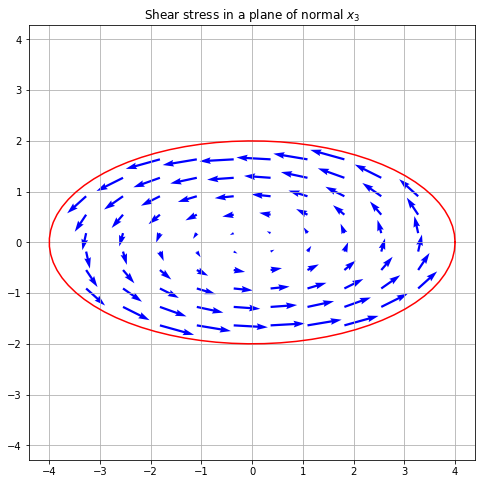

In [214]:
A = 4
B = 2
θ = np.linspace(0, 2*np.pi, 80)
x = A*np.cos(θ)
y = B*np.sin(θ)

fig, ax = plt.subplots(figsize=(8,8))
ax.axis('equal')
ax.plot(x,y, linewidth=1.5, c='r') # the ellipse
ax.grid()
ax.set_title("Shear stress in a plane of normal $x_3$")

# vector field
x = np.linspace(-A, A, 12)
y = np.linspace(-B, B, 12)

X, Y = np.meshgrid(x, y)
u = -2*A**2*(A**2 + B**2)*Y # vector
v = 2*B**2*(A**2 + B**2)*X

w = (X**2/A**2 + Y**2/B**2) > 1 # remove out of bounds
u[w] = np.nan

ax.quiver(X, Y, u, v, linewidth=1.5, color='b');